<b>Dataset:</b> UCI's Bank Marketing Data Set
    
Link --> https://archive.ics.uci.edu/ml/datasets/bank+marketing

<b>Dataset Information:</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data
df = pd.read_csv("bank-additional-full.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The output variable, y, which has information on <b>whether a client has subscribed to a term deposit, is encoded as 'yes' or 'no'.</b> 

In order to simplify our conversion rate computations, we will encode this variable as 1 for 'yes' and 0 for 'no'.

In [3]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
df.head() #check result

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Analyzing and visualizing conversion rates

### Aggregate conversion rate

First, we are going to look at the aggregate conversion rate. 

We can calculate this metric by dividing the total number of clients subscribed to a term deposit by the total number of clients in the data. 

Since we have already encoded the output variable as 1 for those who have converted and 0 for those who have not, in a column named conversion, we can simply sum over this column to get the total number of conversions.

In [5]:
# total number of conversions
total_conversions = df.conversion.sum()

# total number of clients in the data (= number of rows in the data)
total_clients = df.shape[0]

We have 4640 converted clients out of a total of 41188 bank clients, 

which suggests the aggregate conversion rate is 11.27%. In the following section, 

we are going to analyze how these conversion rates vary by different age groups.

### Conversion rates by age

Aggregate conversion rate tells us the overall performance of our marketing campaign. However, it does not give us that much insight. 

When we are reporting and tracking the progress of marketing efforts, we typically would want to dive deeper into the data and break down the customer base into multiple segments and compute KPIs for individual segments. 

We will first break our data into smaller segments by age and see how the conversion rates differ by different age groups.

In [6]:
# conversions by 'age'
conversions_by_age = df.groupby(by='age')['conversion'].sum()

In [7]:
# total clients by 'age'
total_clients_by_age = df.groupby(by='age')['conversion'].count()

In [8]:
conversion_rate_by_age = (conversions_by_age/total_clients_by_age) * 100.0

In [9]:
conversion_rate_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

### Visualizing 'Conversion Rate by Age'

We can look at conversion rates across client ages by plotting a line chart.

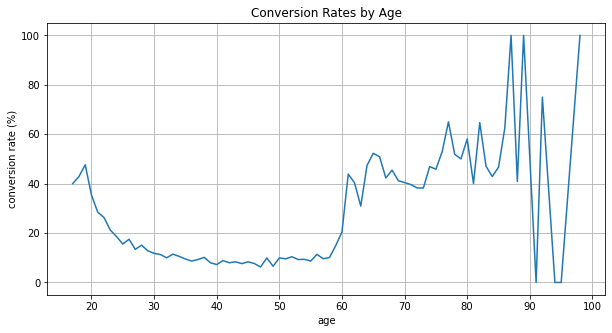

In [10]:
ax = conversion_rate_by_age.plot(grid=True, 
                             figsize=(10, 5), 
                            title = "Conversion Rates by Age")

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

One thing that is noticeable in the previous line chart is the fact that there seems to be lots of noise in old age groups. Conversion rates for those who are 70 or older vary a lot and if you look at the data, this is mostly because the number of clients in this age group is relatively small, compared to other age groups.

In order to reduce this unwanted noise, we can group multiple ages together. In this exercise, we group bank clients into six different groups, based on their age—between 18 and 30, between 30 and 40, between 40 and 50, between 50 and 60, between 60 and 70, and 70 and older. The following code can be used to group the clients into their corresponding groups:

In [11]:
df['age_group'] = df['age'].apply(lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
                                  else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
                                  else '[60, 70)' if x < 70 else '70+')

In [12]:
df['age_group']

0        [50, 60)
1        [50, 60)
2        [30, 40)
3        [40, 50)
4        [50, 60)
           ...   
41183         70+
41184    [40, 50)
41185    [50, 60)
41186    [40, 50)
41187         70+
Name: age_group, Length: 41188, dtype: object

Calculate the conversion rates for these newly created age groups

In [13]:
# conversions by 'age_group'
conversions_by_age_group = df.groupby(by='age_group')['conversion'].sum()

# total clients by 'age_group'
clients_by_age_group = df.groupby(by='age_group')['conversion'].count()

In [14]:
conversion_rate_by_age_group = (conversions_by_age_group / clients_by_age_group) * 100.0

In [15]:
conversion_rate_by_age_group.to_frame()

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


Now, the variations by each age group are much smaller than before, especially in old age groups. We can visualize this data using a bar plot.

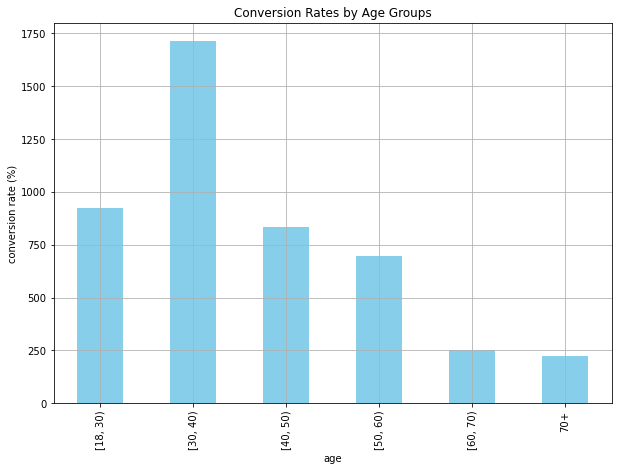

In [16]:
ax = conversions_by_age_group.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(kind='bar',
                                                                                                           color='skyblue',
                                                                                                           grid=True,
                                                                                                           figsize=(10, 7),
                                                                                                           title="Conversion Rates by Age Groups")

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversions versus Non-conversions

One other thing we can look at is <b>the demographic differences between the converted clients and non-converted clients.</b> 

This type of analysis can help us identify what differentiates converted groups from non-converted groups in our marketing campaigns and help us understand our target clients better and what types of customers respond better to our marketing efforts. 

In this project, <b>we will compare the distributions of the marital status among the conversions and non-conversions groups.</b>

We will first count the number of conversions and non-conversions for each marital status.

In [17]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)

In [18]:
conversions_by_marital_status_df.rename(columns={0:'non-conversions', 1:'conversions'}, inplace=True)

In [19]:
conversions_by_marital_status_df

conversion,non-conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


### Visualizing the data

Represent the above data by using pie charts.

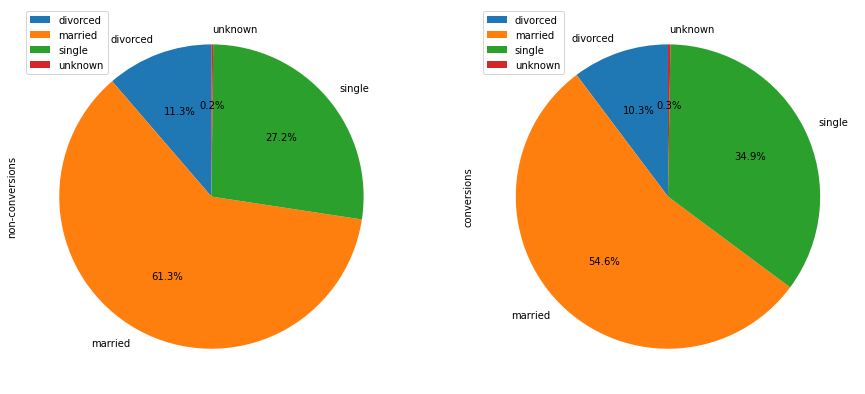

In [20]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

With pie charts, we can easily see that <b>the married group takes up the largest proportions in both conversions and non-conversions groups, while the single group comes as the second.</b> 

Using pie charts, we can easily visualize the similarities and differences between two groups.

### Conversions by "age" and "marital status"

We have aggregated our data by one criterion. 

However, there are cases where you want to group the data by more than one column. 

In this section, we will discuss how we can analyze and report conversion rates by more than one criterion. 

We will use age groups that we have built in the previous section and the marital status as the two columns to group by.

In [21]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

age_marital_df = age_marital_df.divide(
    df.groupby(by='age_group')['conversion'].count(),
    axis=0)

As you can see from this code, we are grouping our data by the two columns, 'age_group' and 'marital', and summing the number of conversions. 

Then, we divide this by the total number of clients in each group. 

The resulting data looks like:

In [22]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


As you can see from this data, 

we can now see the distribution of conversion rates based on two criteria, age group and martial status. 

For example, the conversion rate of clients who are single and between 18 and 30 years old is 13.25%,

while the conversion rate of clients who are married and between 60 and 70 years old is 30.11%.

### Visualizing the Data

Another way to visualize this data is to use a bar plot that looks like the following.

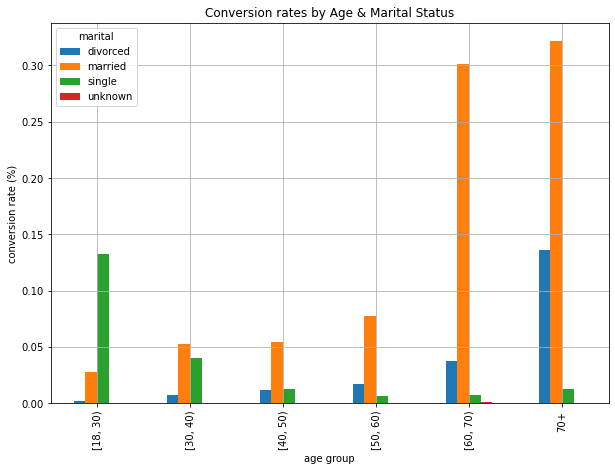

In [23]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(kind='bar', 
                                                                                                  grid=True,
                                                                                                  figsize=(10,7))
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

In order to stack those four bars for each age group, then we can use the following code for a stacked bar plot:

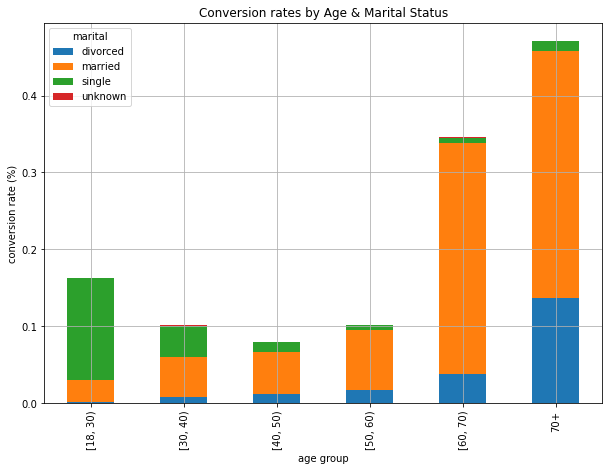

In [24]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(kind='bar',
                                                                                                  stacked=True,
                                                                                                  grid=True,
                                                                                                  figsize=(10,7))

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

As you can see from this stacked bar plot, different marital statuses are stacked on top of each other for each of the age groups. 

This way, we can not only easily see the overall trends in conversion rates across different age groups, but also the proportions of converted clients with different marital statuses for each age group.

<b> Project is completed. </b>